# Extraindo Tweets com Python | Análise de Dados #15

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tweepy as tw
import pandas as pd

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
with open('/content/drive/MyDrive/Colab Notebooks/analise-dados-master/notebooks/twitter-tokens.txt', 'r') as tfile:
    consumer_key = tfile.readline().strip('\n')
    consumer_secret = tfile.readline().strip('\n')
    bearer_token = tfile.readline().strip('\n')
    access_token = tfile.readline().strip('\n')
    access_token_secret = tfile.readline().strip('\n')

In [6]:
auth = tw.AppAuthHandler(consumer_key, consumer_secret)

In [7]:
api = tw.API(auth)
for tweet in tw.Cursor(api.search_tweets, q='tweepy').items(10):
    print(tweet.text)

Hello Tweepy
@DylanLeClair_ if you are using tweepy then check if it’s version 4.0.0 or later! 

https://t.co/1sruxJ04Jf
@DylanLeClair_ if you’re using tweepy then it seems it’s probably calling the v1 api and your access is v2 only 

https://t.co/hHlHcRzKvT
tweepy + Twitter API V2でツイート https://t.co/QDBdDthtds #Qiita ハマりポイントとしてUser Authentications settingsをしてからAPI key生成しな… https://t.co/PzrTburFu2
¿Anfibio o pez?  #NationalGeographic #Fotodeldia #Python #Tweepy https://t.co/AT8fFiFMlm
Tweepy……
Tweepy…
RT @MamaNeedsXanax: Happy Easter Tweepy Peeps! 🐣🌷🐇 https://t.co/Qt2vqJZ6e0
RT @MamaNeedsXanax: Happy Easter Tweepy Peeps! 🐣🌷🐇 https://t.co/Qt2vqJZ6e0
RT @MamaNeedsXanax: Happy Easter Tweepy Peeps! 🐣🌷🐇 https://t.co/Qt2vqJZ6e0


In [ ]:
#client = tw.Client(bearer_token=bearer_token, 
#                   consumer_key=consumer_key, 
#                   consumer_secret=consumer_secret,
#                   access_token=access_token,
 #                  access_token_secret=access_token_secret)

In [8]:
query_search= "iron ore from:business"
devenv= 'ironorebusiness'

In [32]:
pesquisa=api.search_full_archive(label=devenv, query=query_search, fromDate=201507010000, toDate=201510220000)

In [10]:
#ct=0 #Rodar somente na primeira vez

In [33]:
for twitters in pesquisa:
    print(twitters.created_at)
    print(twitters.text)
    ct+=1

2015-08-25 07:08:59+00:00
Mining giant BHP Billiton sees full-year profit fall by 52% amid commodity price slump http://t.co/3VzgIKu78O
2015-08-08 01:02:00+00:00
Rio Tinto Group’s iron-ore earnings are being hammered by collapse in prices it helped create http://t.co/EvTRRcXUtj
2015-08-07 17:21:01+00:00
Rio Tinto Group’s iron-ore earnings are being hammered by collapse in prices it helped create http://t.co/EvTRRcXUtj http://t.co/H6DlRk3hVU
2015-07-14 21:31:36+00:00
To cut or not to cut? Vale makes the first move in iron ore debate http://t.co/9bpQTMhHJx http://t.co/xWzqoJIDMF


In [34]:
ct

504

In [14]:
#resultado = [] #Rodar somente na primeira vez

In [35]:
for twitters in pesquisa:
    resultado.append(twitters.created_at)
    resultado.append(twitters.text)

resultado            

[datetime.datetime(2022, 1, 20, 5, 29, 4, tzinfo=datetime.timezone.utc),
 'Iron ore futures held above $130 a ton as China’s pledge to spur the economy bolstered demand prospects for the raw… https://t.co/wIuq6cqTME',
 datetime.datetime(2022, 1, 19, 4, 44, 5, tzinfo=datetime.timezone.utc),
 'Iron ore led gains among industrial metals as China vows to use more monetary policy tools to spur the economy https://t.co/SIithjUxl8',
 datetime.datetime(2022, 1, 12, 11, 10, 2, tzinfo=datetime.timezone.utc),
 'Iron ore advanced to the strongest level since the middle of October https://t.co/RboC0xkGDC https://t.co/AaWYzsuqH7',
 datetime.datetime(2022, 1, 11, 3, 2, 4, tzinfo=datetime.timezone.utc),
 'Rio Tinto, the world’s biggest producer of iron ore, will deploy zero-emissions trains at its Pilbara mines in Aust… https://t.co/tUyJVnFR7q',
 datetime.datetime(2022, 1, 10, 16, 26, 4, tzinfo=datetime.timezone.utc),
 'Vale, the world’s second-largest iron ore producer, halted some mine production be

In [36]:
import numpy as np
matriz_np = np.array(resultado)

matriz_ajustada = np.reshape(matriz_np, (ct,2))

In [37]:
df = pd.DataFrame()

colunas = [
    'Data_publicacao',
    'tweet'
]

df = pd.DataFrame(matriz_ajustada,columns=colunas)

In [38]:
df

,Data_publicacao,tweet
0,2022-01-20 05:29:04+00:00,Iron ore futures held above $130 a ton as Chin...
1,2022-01-19 04:44:05+00:00,Iron ore led gains among industrial metals as ...
2,2022-01-12 11:10:02+00:00,Iron ore advanced to the strongest level since...
3,2022-01-11 03:02:04+00:00,"Rio Tinto, the world’s biggest producer of iro..."
4,2022-01-10 16:26:04+00:00,"Vale, the world’s second-largest iron ore prod..."
...,...,...
499,2015-10-22 08:54:47+00:00,"Earnings drop 15% at Vale, the world's biggest..."
500,2015-08-25 07:08:59+00:00,Mining giant BHP Billiton sees full-year profi...
501,2015-08-08 01:02:00+00:00,Rio Tinto Group’s iron-ore earnings are being ...
502,2015-08-07 17:21:01+00:00,Rio Tinto Group’s iron-ore earnings are being ...


In [39]:
arquivo_tweets = 'tweets_t.csv'
df.to_csv(arquivo_tweets, encoding='utf-8', index=False,quotechar='|')

In [ ]:
pip install Wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tweets = df['tweet']
todos_twitters = " ".join(s for s in tweets)

In [ ]:
todos_twitters

'Iron ore futures held above $130 a ton as China’s pledge to spur the economy bolstered demand prospects for the raw… https://t.co/wIuq6cqTME Iron ore led gains among industrial metals as China vows to use more monetary policy tools to spur the economy https://t.co/SIithjUxl8 Iron ore advanced to the strongest level since the middle of October https://t.co/RboC0xkGDC https://t.co/AaWYzsuqH7 Rio Tinto, the world’s biggest producer of iron ore, will deploy zero-emissions trains at its Pilbara mines in Aust… https://t.co/tUyJVnFR7q Vale, the world’s second-largest iron ore producer, halted some mine production because of heavy rainfall in the st… https://t.co/I5qK9CC56J Metals are heading for more drama after a tumultuous 2021 dominated by supply squeezes, China’s property-led econom… https://t.co/zwcvxEZLR9 Iron ore decline as investors weighed expectations that the steelmaking raw material will face a surplus next year https://t.co/Afxr4Hhdzb Vale, the world’s second-largest iron ore pr

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
minha_nuvem = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=800).generate(todos_twitters)

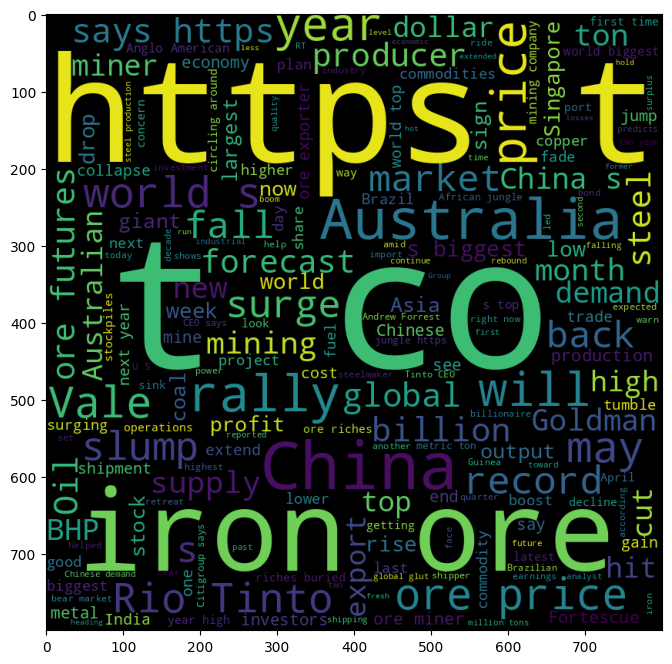

In [ ]:
import matplotlib.pyplot as plt

figura, eixo = plt.subplots(figsize=(8,8))
plt.imshow(minha_nuvem)

In [ ]:
meu_stopwords = set(STOPWORDS)
meu_stopwords.update(['https://t.co'])

In [ ]:
minha_nuvem = WordCloud(stopwords=meu_stopwords, background_color='black', width=800, height=800).generate(todos_twitters)

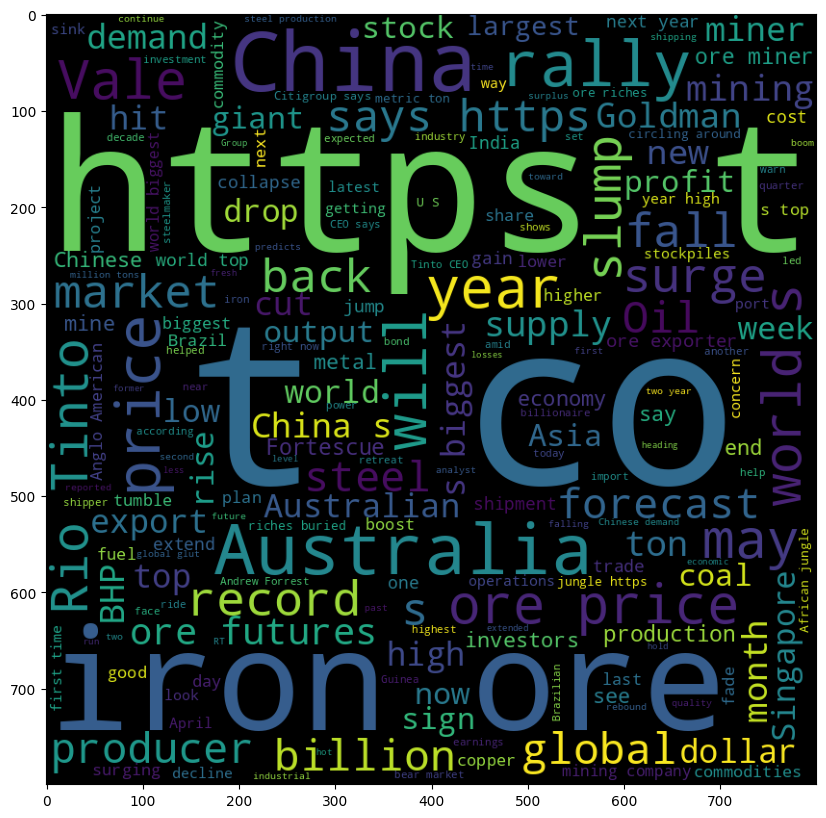

In [ ]:
figura, eixo = plt.subplots(figsize=(10,10))
plt.imshow(minha_nuvem)